In [64]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sea
ird = load_iris()

In [2]:
print(ird.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [16]:
print(ird["feature_names"][:5])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [25]:
print(type(ird["feature_names"]))

<class 'list'>


In [13]:
print(len(ird["data"]))

150


In [14]:
print(ird["filename"])

/home/xanrick/dev/env/mlenv/lib/python3.6/site-packages/sklearn/datasets/data/iris.csv


In [10]:
print(ird["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ird["data"], ird["target"], random_state=0)

In [31]:
print(type(y_test))

<class 'numpy.ndarray'>


In [33]:
ird_df = pd.DataFrame(X_train, columns=ird.feature_names)
ird_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.9,3.0,4.2,1.5
1,5.8,2.6,4.0,1.2
2,6.8,3.0,5.5,2.1
3,4.7,3.2,1.3,0.2
4,6.9,3.1,5.1,2.3


In [258]:
# sea.pairplot(data=ird_df,hue="category", kind="scatter")

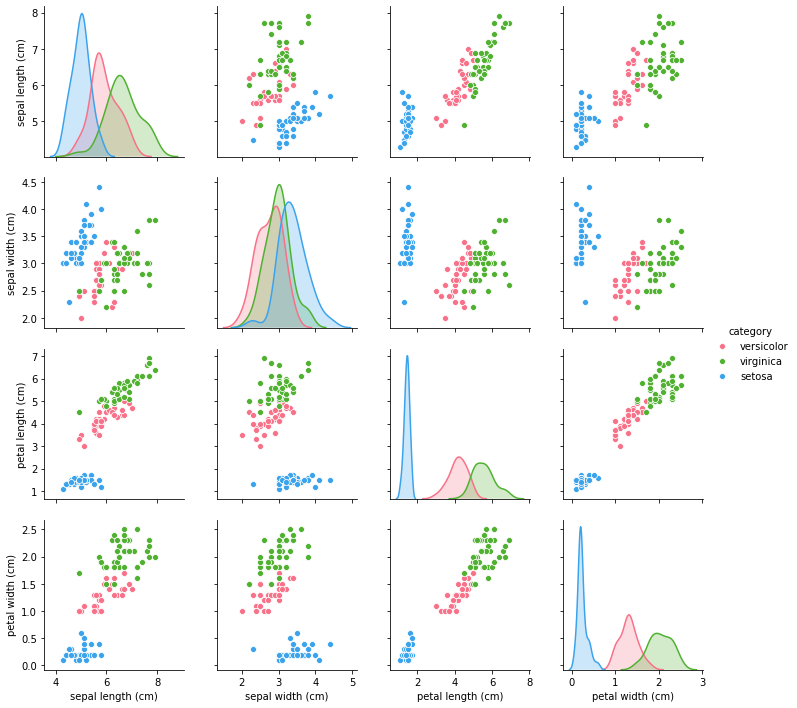

In [189]:
sea.pairplot(data=ird_df,hue="category", kind="scatter", palette="husl")

In [48]:
ird_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.9,3.0,4.2,1.5
1,5.8,2.6,4.0,1.2
2,6.8,3.0,5.5,2.1
3,4.7,3.2,1.3,0.2
4,6.9,3.1,5.1,2.3


In [66]:
ird_df["category"]=n

In [69]:
ird_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),category
0,5.9,3.0,4.2,1.5,versicolor
1,5.8,2.6,4.0,1.2,versicolor
2,6.8,3.0,5.5,2.1,virginica
3,4.7,3.2,1.3,0.2,setosa
4,6.9,3.1,5.1,2.3,virginica


In [56]:
ird["target_names"][0]

'setosa'

In [65]:
l = []
for i in y_train:
#     print(i)
    l.append(ird["target_names"][i])
l
n = np.array(l)
print(type(n), n)

<class 'numpy.ndarray'> ['versicolor' 'versicolor' 'virginica' 'setosa' 'virginica' 'setosa'
 'setosa' 'versicolor' 'virginica' 'virginica' 'virginica' 'virginica'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'virginica'
 'virginica' 'virginica' 'virginica' 'versicolor' 'virginica' 'versicolor'
 'setosa' 'virginica' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'virginica' 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa' 'setosa'
 'versicolor' 'setosa' 'virginica' 'versicolor' 'setosa' 'versicolor'
 'virginica' 'versicolor' 'setosa' 'virginica' 'virginica' 'virginica'
 'virginica' 'setosa' 'setosa' 'virginica' 'virginica' 'setosa'
 'virginica' 'setosa' 'virginica' 'virginica' 'setosa' 'setosa'
 'virginica' 'setosa' 'setosa' 'setosa' 'versicolor' 'virginica'
 'virginica' 'setosa' 'setosa' 'setosa' 'versicolor' 'versicolor' 'setosa'
 'setosa' 'versicolor' 'setosa' 'virginica' 'versicolor' 'virginica'
 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica' 'setosa' 'setos

In [241]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [242]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [243]:
X_new = np.array([[2, 2.0, 2, 1.2]])
prediction = knn.predict(X_new)
print("Prediction:", prediction)
print("Predicted target name:",
       ird['target_names'][prediction])

Prediction: [0]
Predicted target name: ['setosa']


In [244]:
y_pred = knn.predict(X_test)
print("predictions:", y_pred)
print("test:", y_test)

predictions: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
test: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]


In [245]:
type(y_pred)

numpy.ndarray

In [246]:
np.mean(y_pred == y_test)

0.9736842105263158

In [247]:
type((y_pred == y_test))

numpy.ndarray

In [248]:
f"Testscore: {knn.score(X_test, y_test)}"

'Testscore: 0.9736842105263158'

In [249]:
ird_test_df = pd.DataFrame(X_test, columns=ird.feature_names)
result = y_pred == y_test

In [250]:
res = []
for i in result:
    if i == True:
        res.append("Correct Prediction")
    else:
        res.append("Wrong Prediction")
res_arr = np.array(res)
res_arr

array(['Correct Prediction', 'Correct Prediction', 'Correct Prediction',
       'Correct Prediction', 'Correct Prediction', 'Correct Prediction',
       'Correct Prediction', 'Correct Prediction', 'Correct Prediction',
       'Correct Prediction', 'Correct Prediction', 'Correct Prediction',
       'Correct Prediction', 'Correct Prediction', 'Correct Prediction',
       'Correct Prediction', 'Correct Prediction', 'Correct Prediction',
       'Correct Prediction', 'Correct Prediction', 'Correct Prediction',
       'Correct Prediction', 'Correct Prediction', 'Correct Prediction',
       'Correct Prediction', 'Correct Prediction', 'Correct Prediction',
       'Correct Prediction', 'Correct Prediction', 'Correct Prediction',
       'Correct Prediction', 'Correct Prediction', 'Correct Prediction',
       'Correct Prediction', 'Correct Prediction', 'Correct Prediction',
       'Correct Prediction', 'Wrong Prediction'], dtype='<U18')

In [251]:
l = []
for i in y_test:
#     print(i)
    l.append(ird["target_names"][i])
l
cate = np.array(l)


In [252]:
ird_test_df["category"]=cate

In [253]:
ird_test_df.shape

(38, 5)

In [254]:
type(y_pred)
y_pred.shape

(38,)

In [255]:
type(result)
result.shape

(38,)

In [256]:
ird_test_df["result"] = res_arr

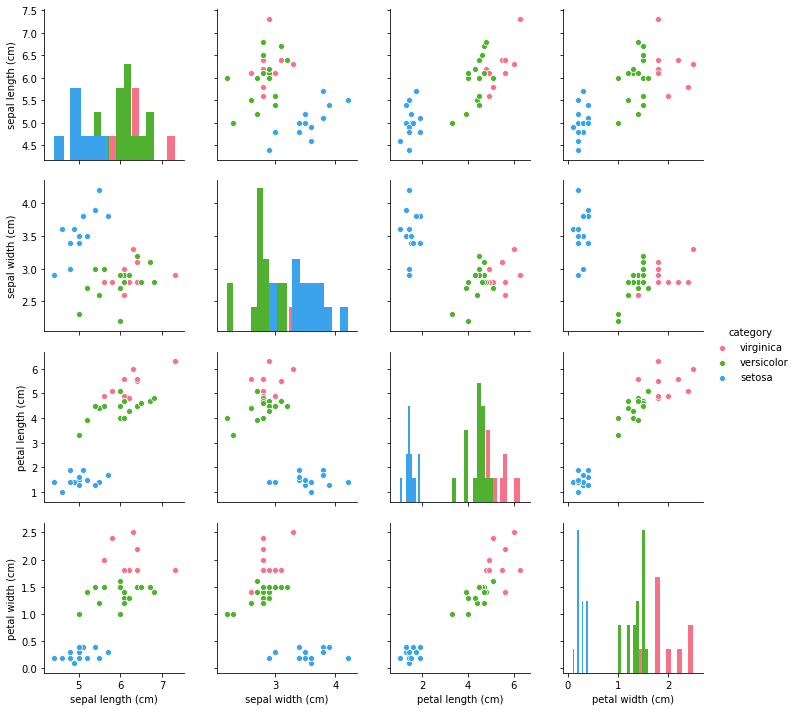

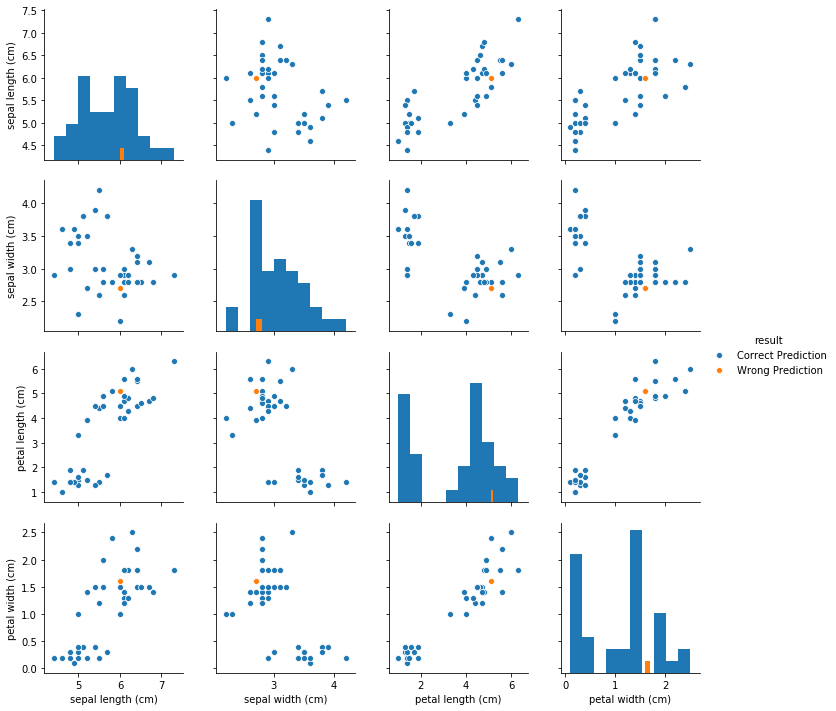

In [257]:
# sea.pairplot(data=ird_test_df, hue = "result")
sea.pairplot(data=ird_test_df,hue="category", kind="scatter", palette="husl", diag_kind="hist")
sea.pairplot(data=ird_test_df,hue="result", kind="scatter", diag_kind="hist")